In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# **The Euro on Forex**
## **Exploring Twenty Years of Volatility**
### Very Brief History
The currency exchange market has been around since coins were first used. At the end of the 1800s the development of the gold standard fixed currency values to a certain amount of gold, allowing for an internationally stable monetary system (1). Eventually the amount of gold was not enough to keep up with the demand for currency. After World War II the Bretton Woods Accord set the US Dollar as the global fixed currency. This created an adjustable rate exchange, but it was still determined by central banks and state actors (2). The US dollar was pegged to gold at the time, and during the 1970s the same liquidity problem (i.e. amount of gold vs currency in circulation) occurred. In August of 1971 President Richard Nixon unilaterally canceled direct international convertibility of the US dollar to gold, inadvertently beginning a regime of free-floating currencies (3).

### Today
The modern foreign exchange market (Forex, FX, or currency market) is a direct broker to dealer global marketplace that determines the market value and exchange rate of currencies all over the world. It is open 24 hours a day, 5 days a week. Currencies are always traded in pairs, and the value expressed is of one currency relative to another. For example, at the end of the day on 11/19/21 the Euro to US dollar rate was 1.13, or $1.13 equals €1. All of the twenty most traded currencies are free-floating, their value is determined by political conditions, economic factors and market psychology.

Forex is by far the largest financial market in the world, in 2019 having a daily volume of over $6.6 trillion (4). The Euro to US dollar (EURUSD) is the most traded currency pair, taking about 30% of the multi-billion dollar Forex turnover (5).

### Methodology
This study examines the more than two decades of exchange rates for the Euro. It uses the 2019 Triennial Central Bank Survey by the Bank for International Settlements to determine four currencies that represent large portions of the market and four currencies that represent small portions of the market. The highly traded currencies are the US dollar, Japanese yen, UK pound, and Australian dollar. The Israeli shekel, Phillipine peso, Malaysian ringgit, and Romanian leu comprise the group of least traded currencies.

The data set used is based on daily closing values provided by the European Central Bank and compiled by Daria Chemkaeva. It is updated weekly, the version used for this study was downloaded from Kaggle in November 2021.

### Summary
This study demonstrates that geopolitics has broad influence on the foreign exchange market. This is shown through the correlation between historical events and changes in FOREX. This study also reveals global and regional synchronicity in exchange rate volatility.
<br><br>

## **Initial Look**
The first steps are to import the basic libraries, open the file, and take an initial look at the dataset.



In [2]:
# import libraries and set display options
import pandas as pd
import pprint

# set frame width and center output
from IPython.core.display import display, HTML
display(HTML("""
<style>
.container {width:84% !important;
}
</style>
"""))

# pretty print options
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 3000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# open file
x_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

# head, tail, and basic info
# display(x_rates.head())
# display(x_rates.tail())
# display(x_rates.info())

## **Initial Look Continued**
The dataset covers the time period from January 1999 to January 2021. It has 5699 rows and 41 columns. Some of these columns have less than half the number of entries as other columns. In the original data set, cells with missing entries have a hyphen (-). This causes problems with a lot of the functions that will be used. For the time being the hyphens will be converted to the value ```NaN```, which preserves the row of information.
## **Data Cleaning**
The first steps will be:
* Clean and modify column names
* Convert to `datetime` data type
* Sort the values with oldest first and reset the index
* Clean currency columns
* Convert exchange rates to floats

In [3]:
# strip brackets and trailing space from country names
# replace remaining space with underscore
# lower case all column names
x_rates.columns = x_rates.columns.str.replace("[","").str.replace("]","")
x_rates.columns = x_rates.columns.str.rstrip()
x_rates.columns = x_rates.columns.str.replace(" ","_")
x_rates.columns = x_rates.columns.str.lower()

# rename columns
x_rates.rename(columns={"period\\unit:":"date",
                        "chinese_yuan_renminbi":"chinese_yuan",
                        "uk_pound_sterling":"uk_pound"}, inplace=True)

# convert datetime
x_rates["date"] = pd.to_datetime(x_rates["date"])

# resort and reindex
x_rates.sort_values("date", inplace=True)
x_rates.reset_index(drop=True, inplace=True)

# convert hyphens in currency columns to NaN
import numpy as np
x_rates = x_rates.replace("-", np.nan)

# convert exchange rate values to float
x_rates.iloc[:,1:] = x_rates.iloc[:,1:].astype(float)

display(x_rates.head())

/var/folders/bz/5cj1tzbj5xn319rpqrw6gpmh0000gn/T/ipykernel_31342/1632861684.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  x_rates.columns = x_rates.columns.str.replace("[","").str.replace("]","")


,date,australian_dollar,bulgarian_lev,brazilian_real,canadian_dollar,swiss_franc,chinese_yuan,cypriot_pound,czech_koruna,danish_krone,estonian_kroon,uk_pound,greek_drachma,hong_kong_dollar,croatian_kuna,hungarian_forint,indonesian_rupiah,israeli_shekel,indian_rupee,iceland_krona,japanese_yen,korean_won,lithuanian_litas,latvian_lats,maltese_lira,mexican_peso,malaysian_ringgit,norwegian_krone,new_zealand_dollar,philippine_peso,polish_zloty,romanian_leu,russian_rouble,swedish_krona,singapore_dollar,slovenian_tolar,slovak_koruna,thai_baht,turkish_lira,us_dollar,south_african_rand
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.5823,35.1070,7.4501,15.6466,0.7111,327.1500,9.1332,NaN,251.4800,"9,433.6100",NaN,NaN,81.4800,133.7300,"1,398.5900",4.7170,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.5100,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.9910,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.5823,34.9170,7.4495,15.6466,0.7122,324.7000,9.1341,NaN,250.8000,"9,314.5100",NaN,NaN,81.5300,130.9600,"1,373.0100",4.7174,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.7450,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.8480,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.5820,34.8500,7.4452,15.6466,0.7076,324.7200,9.1010,NaN,250.6700,"9,337.6800",NaN,NaN,81.5400,131.4200,"1,359.5400",4.6994,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.8720,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.7780,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.5819,34.8860,7.4431,15.6466,0.7058,324.4000,9.0131,NaN,250.0900,"9,218.7700",NaN,NaN,81.0600,129.4300,"1,337.1600",4.6548,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.4360,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.7650,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.5819,34.9380,7.4433,15.6466,0.7094,324.0000,9.0302,NaN,250.1500,"9,321.6300",NaN,NaN,80.9900,130.0900,"1,366.7300",4.6643,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.2950,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.5600,42.5590,0.3718,1.1659,6.7855


## **Euro to Dollar**
A line graph is a great way to look at change over time. The Euro to US dollar is the first trading pair to be examined. This will create a good foundation for the rest of the project.

/var/folders/bz/5cj1tzbj5xn319rpqrw6gpmh0000gn/T/ipykernel_31342/3872747887.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6], fontsize=18, weight="bold")


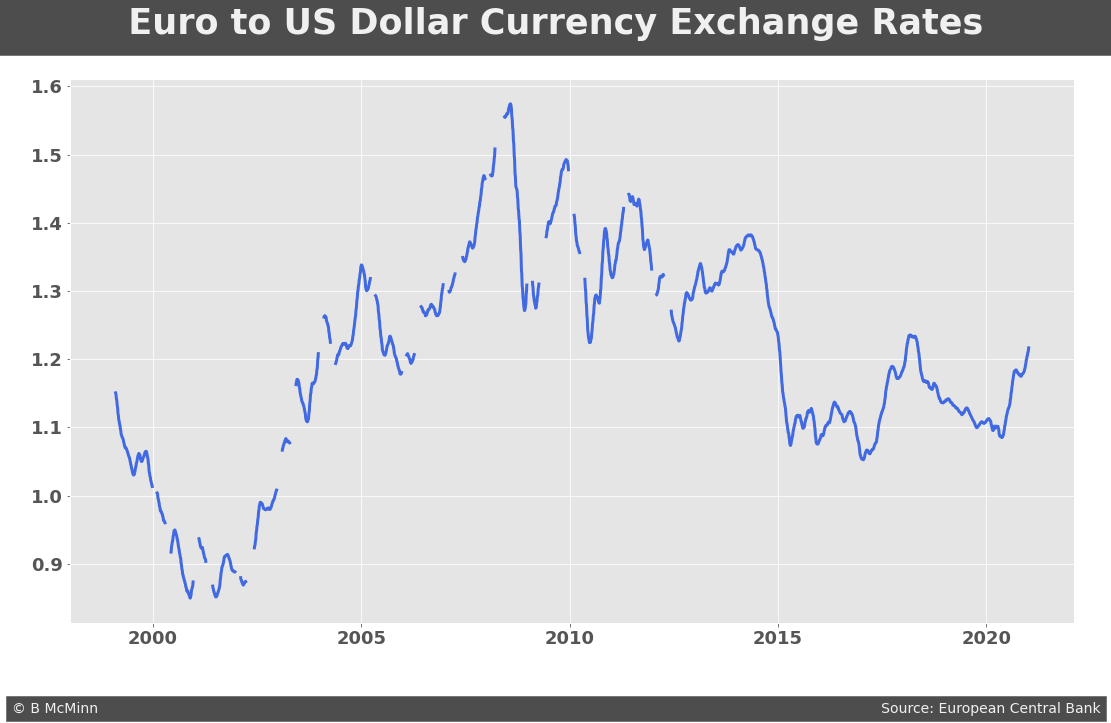

In [4]:
# create a us dollar to euro dataframe and add 30 day rolling mean column
us_dollar = x_rates[["date","us_dollar"]].copy()
us_dollar["rolling_mean_30"] = us_dollar["us_dollar"].rolling(30).mean()

# line graph for dollar to euro exchange rate
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot') # set style for graphs
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(us_dollar["date"], us_dollar["rolling_mean_30"], color="royalblue", linewidth=3)
ax.set_xticks(["2000-01-04 00:00:00", "2005-01-04 00:00:00", "2010-01-04 00:00:00",
               "2015-01-04 00:00:00", "2020-01-04 00:00:00"])
ax.set_xticklabels([2000,2005,2010,2015,2020], fontsize=18, weight="bold")
# ax.set_yticks([0,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6])
ax.set_yticklabels([0,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6], fontsize=18, weight="bold")
ax.text(0.08, 0.0, "© B McMinn" + " "*174 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=14,
        transform=fig.transFigure)
fig.suptitle(" "*10 + "Euro to US Dollar Currency Exchange Rates" + " "*10,
             color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=35, weight="bold")
plt.show()

## **Euro to Dollar Continued**
* The line graph shows that the exchange rate between the Euro and US dollar is pretty variable.
* This is the only graph showing a value for the currency being traded against the Euro. It shows that at it's highest value &euro;1 traded for about \\$1.60. At one point the Euro trades for less than \\$1. However for this study, comparing across currencies and looking at particular regional events makes the actual currency amount less relevant.
* There are also a lot of gaps in the graph. These represent points in the data frame where information for a particular day is missing. This is the most accurate representation of the data, but it's not very easy to look at. A quick visual check can illustrate this overlap and then compare the original data frame with one where the missing dates are removed.

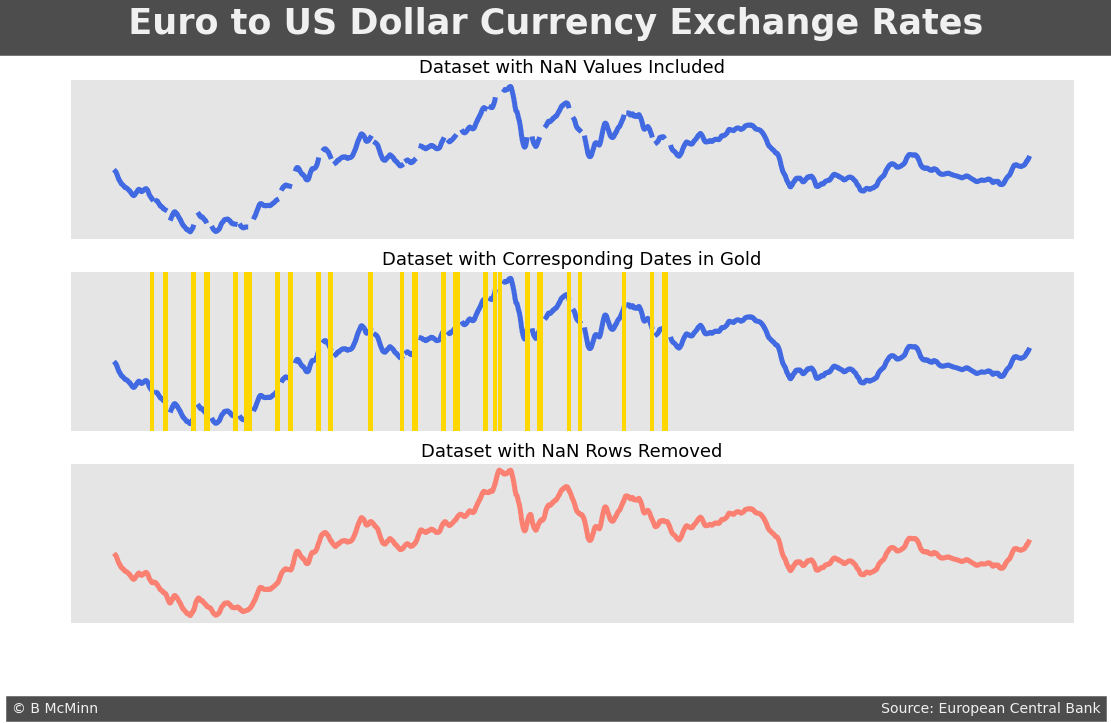

In [5]:
# create nan group and get dates
nan_dollar_group = us_dollar[us_dollar["us_dollar"].isnull()]
nan_days = nan_dollar_group["date"]

# create a dollar to euro dataframe with NaN dates removed
US_dollar_nonull = x_rates[x_rates["us_dollar"].notna()].copy()
US_dollar_nonull["rolling_mean_30"] = US_dollar_nonull["us_dollar"].rolling(30).mean()

# line graph showing dollar to euro showing NaN values with and without highlight
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(18,10))
ax1.plot(us_dollar["date"], us_dollar["rolling_mean_30"], color="royalblue", linewidth=5)
# ax1.set(title="Dataset with NaN Values Included")
ax1.set_title("Dataset with NaN Values Included", fontsize=18)
ax2.plot(us_dollar["date"], us_dollar["rolling_mean_30"], color="royalblue", linewidth=5)
ax2.set_title("Dataset with Corresponding Dates in Gold", fontsize=18)
for xc in nan_days:
   ax2.axvline(x=xc, color="gold", linewidth=4)
ax3.plot(US_dollar_nonull["date"], US_dollar_nonull["rolling_mean_30"], color="salmon", linewidth=5)
ax3.set_title("Dataset with NaN Rows Removed", fontsize=18)
for ax in ax1, ax2, ax3:
    ax.set_xticks([])
    ax.set_xticklabels([])
for ax in ax1, ax2, ax3:
    ax.set_yticks([])
ax.text(0.08, 0.0, "© B McMinn" + " "*174 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=14,
        transform=fig.transFigure)
fig.suptitle(" "*10 + "Euro to US Dollar Currency Exchange Rates" + " "*10,
             color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=35, weight="bold")
plt.show()

## **Euro to Dollar Conclusion**
The second graph shows vertical gold stripes for all dates with missing information. These correspond with the gaps in the original chart. The third graph, with these rows removed, appears to be good match and is easier to look at. This also demonstrates how the rolling mean handles NaN values within a data frame. In either case the shape of the line is identical where the information exists, therefor both are similarly accurate representations of the available data. This would look very different if the program managed days with missing data as 0. This is how the data frames for the next set of graphics will be handled.

## **Euro & Traded Pairs**
### Euro to Highly Traded Currencies
The first set of line graphs represent the exchange rates for the Euro to the US dollar, Japanese yen, UK pound, and Australian dollar. These four currencies, in addition to the Euro, are the top five currencies in the Forex market. All five together comprise over 75% of daily trades (4).
### Euro to Least Traded Currencies
The second set of graphs represent the exchange rates for the Euro to the Israeli shekel, Philippine peso, Malaysian ringgit, and Romanian leu. These four currencies have low trade volumes, they comprise less than 0.4% of daily trades (4).

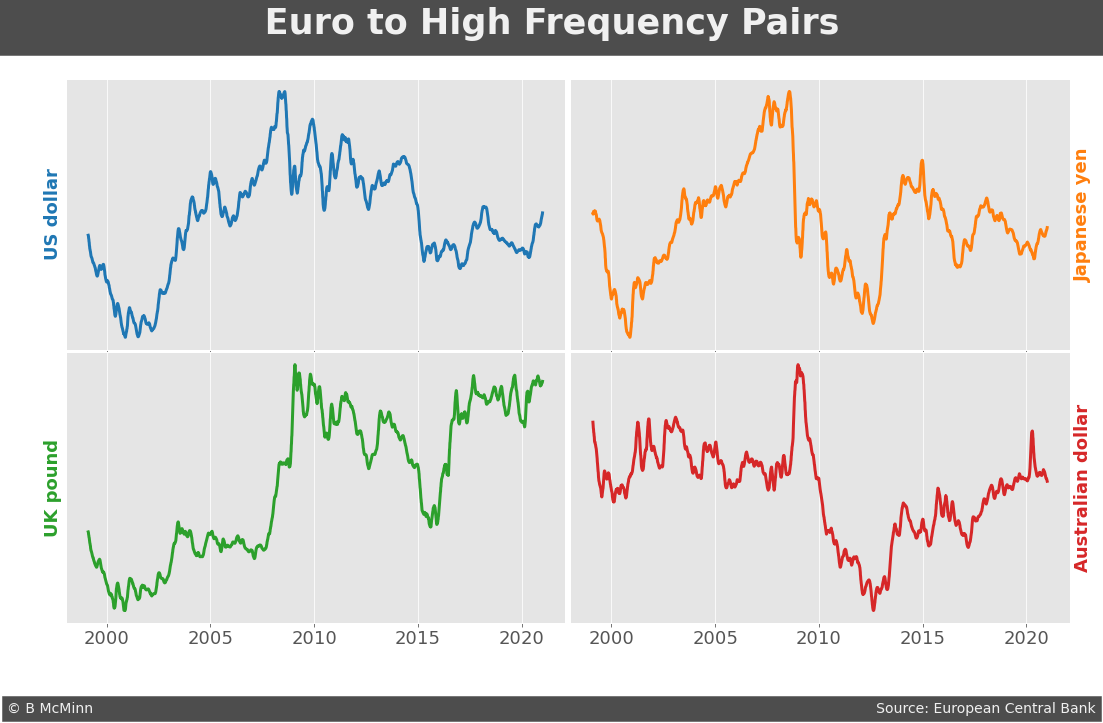

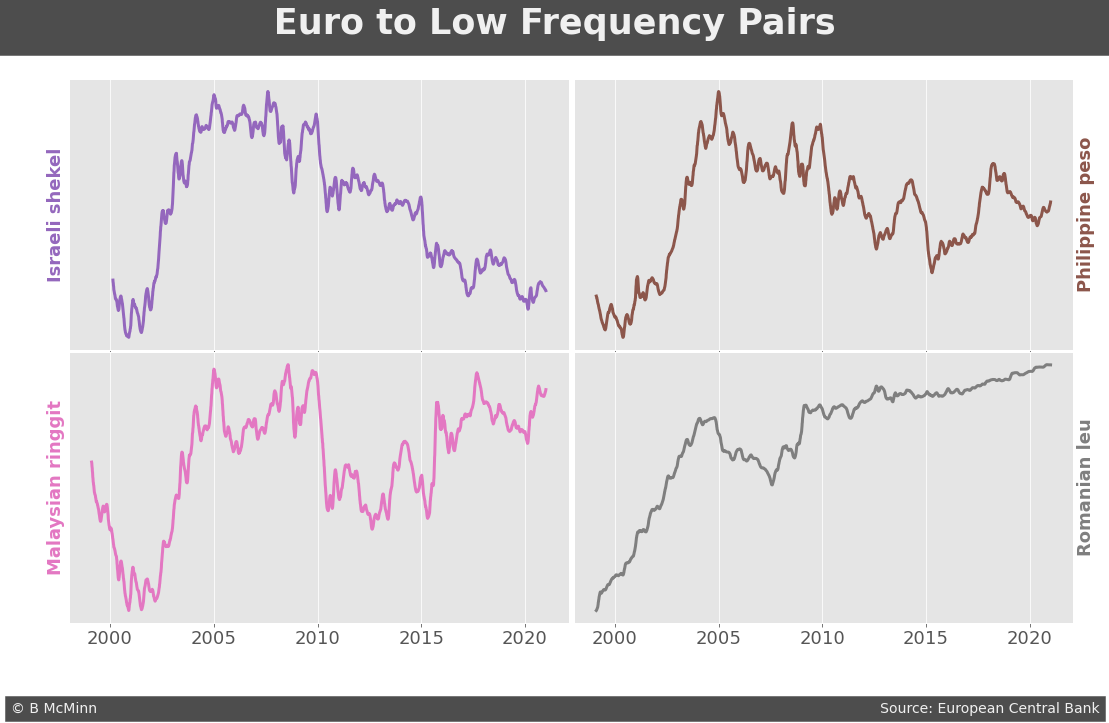

In [6]:
# import colormap and set up color iteration
from matplotlib.pyplot import cm
colors = iter([plt.cm.tab10(i) for i in range(8)])

# create a list of data frames for each currency with log rate of the exchange rate, 30 day rolling mean, and year
df_dict = {}
for currency in x_rates.columns[1:]:
    df_name = currency
    df = x_rates[["date", currency]].copy()
    df = df[df[currency].notna()]
    df["log_rate"] = np.log(df.iloc[:,1]/df.iloc[:,1].shift()) # getting the log of the exchange rate # double check this is the correct way to get log
    df["rolling_mean_30"] = df[currency].rolling(30).mean()
    df["year"] = df["date"].dt.year
    df_dict[currency] = df

# currencies for comparison
high_freq = [df_dict["us_dollar"], df_dict["japanese_yen"], df_dict["uk_pound"], df_dict["australian_dollar"]]
low_freq = [df_dict["israeli_shekel"], df_dict["philippine_peso"], df_dict["malaysian_ringgit"], df_dict["romanian_leu"]]

# line graph showing Euro to each high frequency trading pairs
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18,10))

for ax, currency in zip((ax1, ax2, ax3, ax4), high_freq):
    ax.plot(currency["date"], currency["rolling_mean_30"], linewidth=3, c=next(colors))
for ax in ax1, ax2, ax3, ax4:
    ax.set_xticks(["2000-01-04 00:00:00", "2005-01-04 00:00:00", "2010-01-04 00:00:00",
               "2015-01-04 00:00:00", "2020-01-04 00:00:00"])
    ax.set_xticklabels([2000,2005,2010,2015,2020], fontsize=18)
    ax.set(yticks=[])
#   ax.set_ylabel(str(currency)) # why not, i can get it to change to a string "currency", but not a variable
ax1.set_ylabel("US dollar", fontsize=18, weight="bold", color="tab:blue")
ax2.set_ylabel("Japanese yen", fontsize=18, weight="bold", color="tab:orange")
ax2.yaxis.set_label_position("right")
ax3.set_ylabel("UK pound", fontsize=18, weight="bold", color="tab:green")
ax4.set_ylabel("Australian dollar", fontsize=18, weight="bold", color="tab:red")
ax4.yaxis.set_label_position("right")
plt.subplots_adjust(wspace=0.01,hspace=0.01)
ax.text(0.08, 0.0, "© B McMinn" + " "*174 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=14,
        transform=fig.transFigure)
fig.suptitle(" "*21 + "Euro to High Frequency Pairs" + " "*21,
             color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=35, weight="bold")
plt.show()

# line graph showing Euro to each low frequency trading pairs
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18,10), sharex=True)
for ax, currency in zip((ax1, ax2, ax3, ax4), low_freq):
    ax.plot(currency["date"], currency["rolling_mean_30"], linewidth=3, c=next(colors))
for ax in ax1, ax2, ax3, ax4:
    ax.set_xticks(["2000-01-04 00:00:00", "2005-01-04 00:00:00", "2010-01-04 00:00:00",
               "2015-01-04 00:00:00", "2020-01-04 00:00:00"])
    ax.set_xticklabels([2000,2005,2010,2015,2020], fontsize=18)
    ax.set(yticks=[])
#   ax.set_ylabel(str(currency)) # why not, i can get it to change to a string "currency", but not a variable
ax1.set_ylabel("Israeli shekel", fontsize=18, weight="bold", color="tab:purple")
ax2.set_ylabel("Philippine peso", fontsize=18, weight="bold", color="tab:brown")
ax2.yaxis.set_label_position("right")
ax3.set_ylabel("Malaysian ringgit", fontsize=18, weight="bold", color="tab:pink")
ax4.set_ylabel("Romanian leu", fontsize=18, weight="bold", color="tab:grey")
ax4.yaxis.set_label_position("right")
plt.subplots_adjust(wspace=0.01,hspace=0.01)
ax.text(0.08, 0.0, "© B McMinn" + " "*174 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=14,
        transform=fig.transFigure)
fig.suptitle(" "*22 + "Euro to Low Frequency Pairs" + " "*22,
             color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=35, weight="bold")
plt.show()

## **Euro & Traded Pairs Conclusion**

### High Frequency Pairs
* The US dollar, Japanese yen, and UK pound all show a tight ratio (1:1) with the Euro in the early 2000s.
* Both the Japanese yen and Australian dollar have a period in 2011 or 2012 where the exchange ratio gets tight and then rebounds. Is it really at the same time? Are there any other countries with the same pattern and what could the cause have been?
### Low Frequency Pairs
* The Israeli shekel appears to have steadily closed it's ratio to the Euro over the last two decades, while the Romanian leu is definitely loosing value.
* The shekel and leu appear to be fairly stable, or have low volatility.
* The Israeli shekel, Malaysian ringgit, and Phillipine peso also show the tight ratio of the early 2000s.

## **Alignments**
We can answer some questions and come up with some new ones by overlapping graphs of the exchange rates. Closer looks will often reveal how currencies respond to similar events. The graph below examines the rate for the Euro to the four major currencies simultaneously.

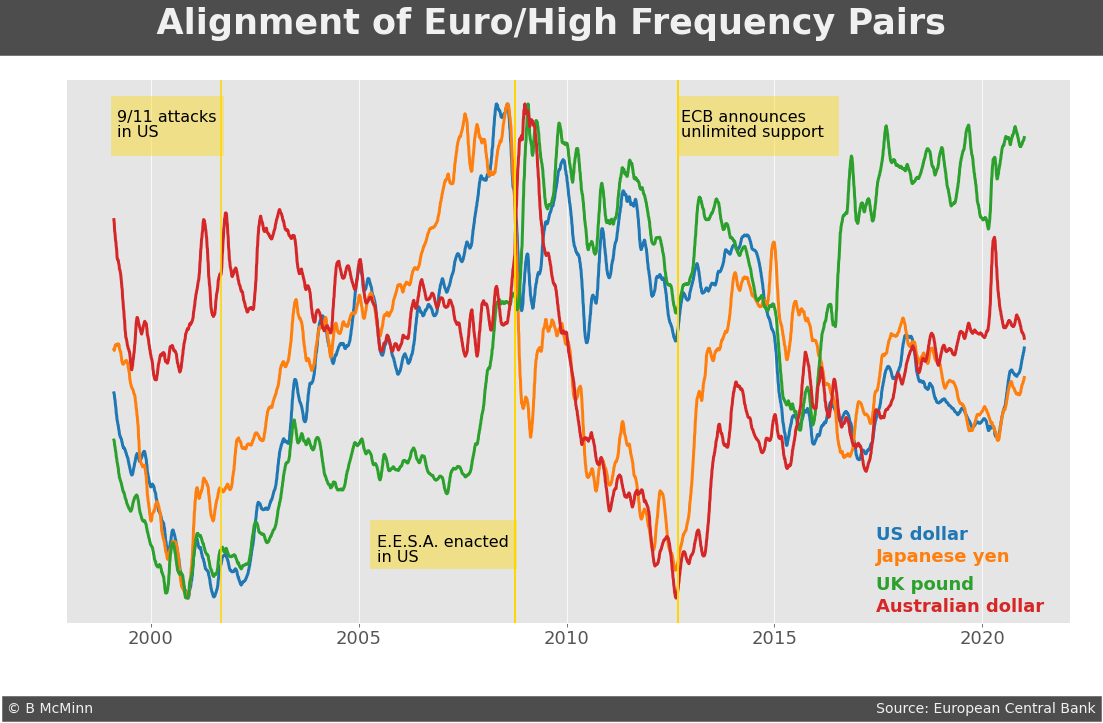

In [7]:
# line graph showing Euro to four high frequency trading pairs overlapped
chart_date_high = (df_dict["us_dollar"]["date"])
colors = iter([plt.cm.tab10(i) for i in range(0,4)])
fig, ax = plt.subplots(figsize=(18,10))
ax1 = ax.twinx()
ax2 = ax.twinx()
ax3 = ax.twinx()
for ax, currency in zip ((ax, ax1,ax2,ax3), high_freq):
    ax.plot(chart_date_high, currency["rolling_mean_30"], linewidth=3, c=next(colors))
    ax.set_xticks(["2000-01-04 00:00:00", "2005-01-04 00:00:00", "2010-01-04 00:00:00",
               "2015-01-04 00:00:00", "2020-01-04 00:00:00"])
    ax.set_xticklabels([2000,2005,2010,2015,2020], fontsize=18)
    ax.set(yticks=[])
# Sept 11, 2001
sept11 = df_dict["us_dollar"]["date"] == "2001-09-11"
sept11 = df_dict["us_dollar"][sept11]
sept11 = sept11["date"]
ax.axvline(x=sept11, alpha=0.8, color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[11], xmax=chart_date_high.iloc[701],
           ymax=0.97,  ymin=0.86, alpha=0.4, color='gold')
ax.text(0.165, 0.82, "9/11 attacks", color="black", fontsize=16,
        transform=fig.transFigure)
ax.text(0.165, 0.8, "in US", color="black", fontsize=16,
        transform=fig.transFigure)
# EESA
eesa = df_dict["us_dollar"]["date"] == "2008-10-03"
eesa = df_dict["us_dollar"][eesa]
eesa = eesa["date"]
ax.axvline(x=eesa, color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[1604], xmax=chart_date_high.iloc[2504],
           ymax=0.19,  ymin=0.10, alpha=0.4, color='gold')
ax.text(0.365, 0.23, "E.E.S.A. enacted", color="black", fontsize=16,
        transform=fig.transFigure)
ax.text(0.365, 0.21, "in US", color="black", fontsize=16,
        transform=fig.transFigure)
# European Debt Crisis
# https://www.businessinsider.com/s?q=euro+forex+2012
# https://www.ecb.europa.eu/pub/pdf/scpwps/ecbwp1532.pdf
edc = df_dict["us_dollar"]["date"] == "2012-09-06"
edc = df_dict["us_dollar"][edc]
edc = edc["date"]
ax.axvline(x=edc, color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[3508], xmax=chart_date_high.iloc[4488],
           ymax=0.97,  ymin=0.86, alpha=0.4, color='gold')
ax.text(0.60, 0.82, "ECB announces", color="black", fontsize=16,
        transform=fig.transFigure)
ax.text(0.60, 0.8, "unlimited support", color="black", fontsize=16,
        transform=fig.transFigure)
# other text
fig.suptitle(" "*12 + "Alignment of Euro/High Frequency Pairs" + " "*12,
             color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=35, weight="bold")
ax.text(0.75, 0.24, "US dollar", color="tab:blue", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.75, 0.21, "Japanese yen", color="tab:orange", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.75, 0.17, "UK pound", color="tab:green", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.75, 0.14, "Australian dollar", color="tab:red", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.08, 0.0, "© B McMinn" + " "*174 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=14,
        transform=fig.transFigure)
plt.show()

## **Alignments Conclusion**
The overlay of the four major currencies shows some very interesting patterns. Broadly speaking, there are periods of strong alignment, divergent alignment, and times with minimal correlation.
* The Japanese yen, UK pound, and US dollar all track closely from the start of data collection through the early years following the September 11 attacks in the US.
* The September 11 attacks also mark a long period where those three currencies have a looser trade ratio with the Euro. It is not evident if this is due to a strong Euro or if the other currencies are trading lower in conjunction.
* In October of 2008 the US President, Treasury Secretary, and Congress enacted the Emergency Economic Stabilization Act, the main pillar of which was the $700 billion Troubled Asset Relief Program (7). This was in response to the 2007-2008 Financial Crises and led to an "unprecedented federal intervention to rescue banks and restore confidence to the finance sector" (8). It marks an interesting point in the Alignment of Euro/High Frequency Pairs graph, and can be seen more closely in the zoomed image below.
<div>
<img src="zoom.png" width="600"/>
</div>
* Lastly, all four trading currencies can be seen responding in a similar way to the 2012 European Debt Crises, by tightening the trading ratio with Euro. On September 06 of that year the European Central Bank announced an open-ended and unlimited period of buying distressed bonds from all Eurozone countries involved in a sovereign state bailout program (9). This was seen as the most dramatic move to that date (10). The Alignment of Euro/High Frequency Pairs graph would seem to indicate that at this point the Euro stopped it's dramatic slide towards a 1:1 ratio and quickly gained ground on the Japanese yen and Australian dollar.

## **Volatility**
A basic explanation of market volatility is the amount of price change for a commodity in a given period of time. This can be seen for stocks, on the FOREX, or in many other places. For traders, especially day and swing traders, volatility is a key component for making financial decisions. To make money in the financial market there must be price movement. Managing the opportunities and risks requires continuous tracking of volatility and associated indicators. This study looks at annual volatility, first for the eight traded currencies and then on a global map for the entire dataset. This broad of a time frame is unlikely to be used for making a specific trade. However, it can reveal patterns that could be used for building a more robust algorithm.

In [8]:
# function to create df with year and annual volatility for every row
volatility_df_list = []
def volatizer(currency):
    annual_df_list = [currency[currency['year'] == y] for y in currency['year'].unique()] # list of annual dfs
    c_name = currency.columns[1]
    row_dict = {} # dictionary with year:annual_volatility as key:value 
    for frame in annual_df_list:
        year_name = frame.iat[0,4] # first cell of the "year" column, becomes the "year" key for row_dict
        annual_volatility = frame["log_rate"].std()*253**.5 # volatility measured by standard deviation * 253 trading days per year raised to the 0.5 power
        row_dict[year_name] = annual_volatility # dictionary with year:annual_volatility as key:value 
    df = pd.DataFrame.from_dict(row_dict, orient="index", columns=[c_name]) # new df from dictionary indexing on year
    volatility_df_list.append(df)

# apply volatizer to each currency df
for key in df_dict:
    df_dict[key] = volatizer(df_dict[key])
    
# create an annual volatility data frame with all 40 currencies
annual_volatility = pd.concat(volatility_df_list, axis=1)
annual_volatility["year"] = annual_volatility.index
# move year to position 0 and set index as int

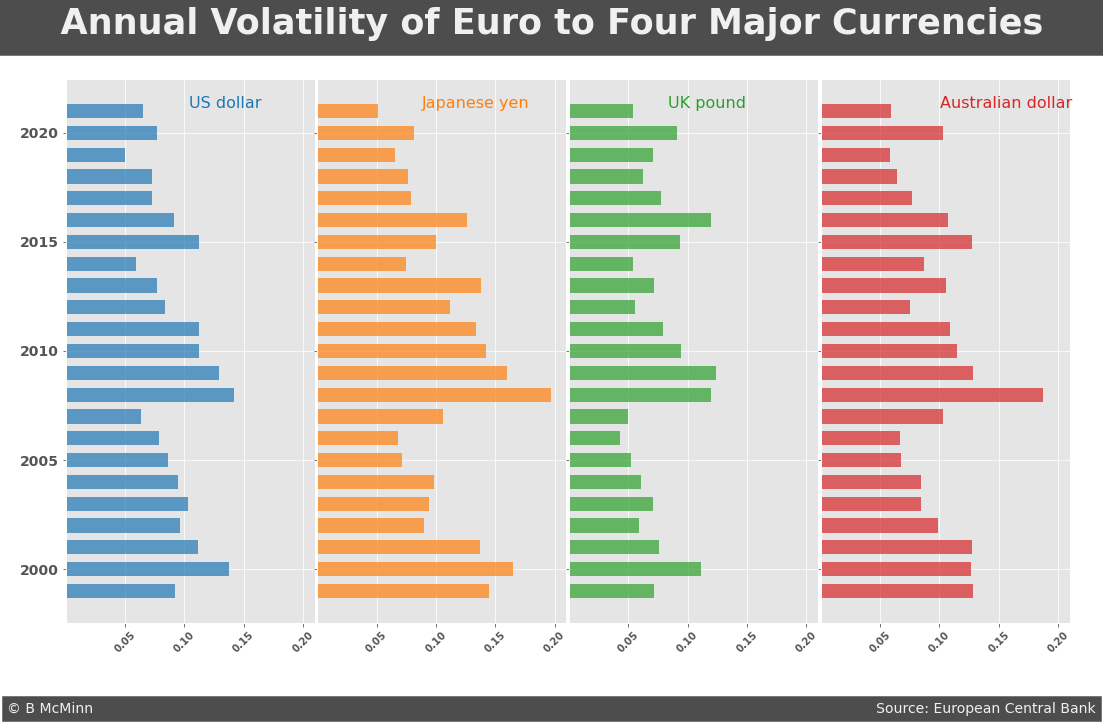

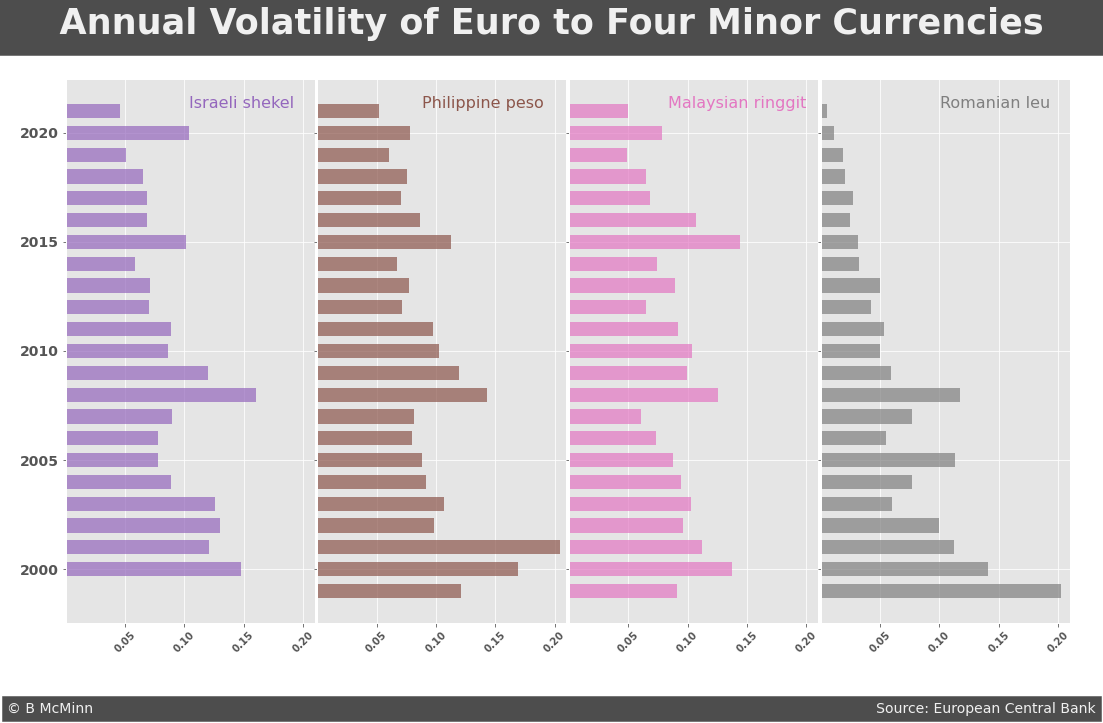

In [9]:
# bar charts comparing volatility for four high and low frequency pairs
high_freq = [annual_volatility["us_dollar"], annual_volatility["japanese_yen"], annual_volatility["uk_pound"], annual_volatility["australian_dollar"]]
low_freq = [annual_volatility["israeli_shekel"], annual_volatility["philippine_peso"], annual_volatility["malaysian_ringgit"], annual_volatility["romanian_leu"]]
years = annual_volatility.iloc[:,40]
colors = iter([plt.cm.tab10(i) for i in range(8)])

# high_freq bar charts
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(18,10), sharey=True)
for ax, currency in zip((ax1, ax2, ax3, ax4), high_freq):
    ax.barh(years, currency, height=0.65, color=next(colors), alpha=0.7)
    ax.set_xlim(0,0.21)
    ax.set_xticks([0.05, 0.1, 0.15, 0.20])
    ax.set_xticklabels(["0.05", "0.10", "0.15", "0.20"], fontsize=10, weight="bold")
    ax.set_yticks([2000, 2005, 2010, 2015, 2020])
    ax.set_yticklabels([2000, 2005, 2010, 2015, 2020], fontsize=14, weight="bold")
    ax.tick_params(axis="x", labelrotation=45)
plt.subplots_adjust(wspace=0.01,hspace=0.01)
ax.text(.22,.84,"US dollar", color="tab:blue", fontsize=16, transform=fig.transFigure)
ax.text(.40,.84,"Japanese yen", color="tab:orange", fontsize=16, transform=fig.transFigure)
ax.text(.59,.84,"UK pound", color="tab:green", fontsize=16, transform=fig.transFigure)
ax.text(.80,.84,"Australian dollar", color="tab:red", fontsize=16, transform=fig.transFigure)
ax.text(0.08, 0.0, "© B McMinn" + " "*174 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=14,
        transform=fig.transFigure)
fig.suptitle(" "*4 + "Annual Volatility of Euro to Four Major Currencies" + " "*4,
             color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=35, weight="bold")
plt.show()

# low_freq bar charts
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(18,10), sharey=True)
for ax, currency in zip((ax1, ax2, ax3, ax4), low_freq):
    ax.barh(years, currency, height=0.65, color=next(colors), alpha=0.7)
    ax.set_xlim(0,0.21)
    ax.set_xticks([0.05, 0.1, 0.15, 0.20])
    ax.set_xticklabels(["0.05", "0.10", "0.15", "0.20"], fontsize=10, weight="bold")
    ax.set_yticks([2000, 2005, 2010, 2015, 2020])
    ax.set_yticklabels([2000, 2005, 2010, 2015, 2020], fontsize=14, weight="bold")
    ax.tick_params(axis="x", labelrotation=45)
plt.subplots_adjust(wspace=0.01,hspace=0.01)
ax.text(.22,.84,"Israeli shekel", color="tab:purple", fontsize=16, transform=fig.transFigure)
ax.text(.40,.84,"Philippine peso", color="tab:brown", fontsize=16, transform=fig.transFigure)
ax.text(.59,.84,"Malaysian ringgit", color="tab:pink", fontsize=16, transform=fig.transFigure)
ax.text(.80,.84,"Romanian leu", color="tab:grey", fontsize=16, transform=fig.transFigure)
ax.text(0.08, 0.0, "© B McMinn" + " "*174 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=14,
        transform=fig.transFigure)
fig.suptitle(" "*4 + "Annual Volatility of Euro to Four Minor Currencies" + " "*4,
             color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=35, weight="bold")
plt.show()

In [10]:
# # uncommenting this cell and running in a geopandas environemnt
# # will produce a series of downloaded map png files

# # this is a very, very kuldge way for me to get the info from
# # the annual volatility datasat to the map dataset
# av_transposed = annual_volatility.transpose()
# av_transposed = av_transposed.drop("year")
# iso_list = ["AU","BG","BR","CA","CH","CN","CY","CZ","DK","EE","GB","GR",
#             "CN","HR","HU","ID","IL","IN","IS","JP","KR","LT","LV","MT",
#             "MX","MY","NO","NZ","PH","PL","RO","RU","SE","SG","SI","SK",
#             "TH","TR","US","ZA"]
# av_transposed.insert(loc=0, column='iso', value=iso_list)
# av_transposed.reset_index(inplace=True)
# av_transposed = av_transposed.rename(columns = {'index':'currency'})

# # import geopandas and other libraries
# #  consider re-writing using geopandas map
# # geo_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# import geopandas as gpd
# import seaborn as sns
# import os
# map_data = gpd.read_file("maps/World_Countries__Generalized_.shp")
# map_data["Volatility"] = None
# concat_map = map_data.merge(av_transposed, left_on="ISO", right_on="iso", how="left")
# map_data = concat_map

# # make maps for the gif
# # replaced -> map_data.plot(column=column, figsize=(18,12), cmap="plasma", missing_kwds=missing_kwds, legend=True, legend_kwds={'label': "Annual Volatility", 'orientation':"horizontal"})
# for column in concat_map.iloc[:,11:34]:
#     map_name = "map_"+str(column)
#     map_data.plot(column=column, figsize=(18,12), cmap="plasma", legend=True,
#                          legend_kwds={'label': "Annual Volatility", 'orientation':"horizontal"})
#     plt.title(str(column))
#     plt.savefig(map_name)

<img src="map_gif.gif" width="950" align="center">

## **Volatility Conclusion**
* The Annual Volatility bar charts appear to show a cyclical pattern in the exchange rate for the Euro to the other trading currencies. It is more apparent with some than others. This pattern repeats at similar but not matching intervals. This suggests that market forces have corresponding effects.
* The bar chart also shows that annual volatility has decreased over the entire span of time for the Romanian leu and, to a lesser extent, the Israeli shekel. This somewhat linear pattern is difficult for capitalizing on. It also points to some specific type of political or economic story.
* The Annual Volatility map confirms that volatility is often distributed evenly throughout all the trading currencies in the data set. It also shows that some outliers retain there uniqueness for multiple years. Russia, Turkey, and South Africa all stand out. The map also reveals the absence of data for large and important geographic areas and specific countries. This includes Central and South America, Africa, and the Middle East as well as Spain, France, and Germany.

## **Further Research**
Examining the historical alignments for the exchange rates of various currencies is a promising avenue. This could be used to illuminate the bi-directional influence of geo-political events and regional economies. Creating a robust interactive tool would allow the researcher increased focus and granularity by allowing them to select specific countries and time periods.

The volatility information this study examined is only the tip of the iceberg for this type of analysis. Incorporating a slider to choose the time frame would greatly increase the ability to make informed trading decisions. This data set provides information that would range down to daily rates, but obviously this could be in much smaller increments. In addition to the bar chart and maps, a line graph with bollinger bars will show more detail. 

## **Citations**
1. Eichengreen, Barry. “Globalizing Capital.” 2009, https://doi.org/10.1515/9781400828814.
2. "Bretton Woods System - Wikipedia". en.wikipedia.org, 2022, https://en.wikipedia.org/wiki/Bretton_Woods_system.
3. Ghizoni. "Nixon Ends Convertibility Of U.S. Dollars To Gold And Announces Wage/Price Controls | Federal Reserve History". Federalreservehistory.org, 2022, https://www.federalreservehistory.org/essays/gold-convertibility-ends.
4. "Foreign Exchange Turnover In April 2019". bis.org, 2022, https://www.bis.org/statistics/rpfx19_fx.htm.
5. "The Most Traded Currency Pairs In Forex (2022 Edition)". FXSSI - Forex Sentiment Board, 2022, https://fxssi.com/the-most-traded-currency-pairs.
6. Chemkaeva. "Daily Exchange Rates Per Euro 1999-2022". kaggle.com, 2022, https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020.
7. "Emergency Economic Stabilization Act Of 2008 - Wikipedia". En.Wikipedia.Org, 2022, https://en.wikipedia.org/wiki/Emergency_Economic_Stabilization_Act_of_2008.
8. David, Marc. "US Government Financial Bailouts". Investopedia, 2022, https://www.investopedia.com/articles/economics/08/government-financial-bailout.asp.
9. "European Debt Crisis - Wikipedia". En.Wikipedia.Org, 2022, https://en.wikipedia.org/wiki/European_debt_crisis#cite_note-ecb-6.
10. Traynor, Ian. "ECB Introduces Unlimited Bond-Buying In Boldest Attempt Yet To End Euro Crisis". The Guardian, 2012, https://www.theguardian.com/business/2012/sep/06/debt-crisis-mario-draghi.

In [11]:
# # need this to correctly get year ticks in DQ server
# years = mdates.YearLocator() # every year
# years_fmt = mdates.DateFormatter('%Y')
# for ax in ax1, ax2, ax3, ax4:
#     ax.xaxis.set_major_locator(years) # format the x ticks
#     ax.xaxis.set_major_formatter(years_fmt)
#     fmt_three_years = mdates.MonthLocator(interval = 36) # Major ticks every 3 years
#     ax.xaxis.set_major_locator(fmt_three_years)
#     ax.set(yticks=[],
#            xlabel="Year")